In [28]:
from data_preporation_field_scale import field_scale
import ee
ee.Initialize()


In [29]:
%load_ext autoreload
%autoreload 2


In [30]:
begin = '2020-10-15'
end =  '2021-10-15'
two_fields = 'vector_data/archangelskoe_TWO_FIELDS_WGS84.geojson'
region_boundary = 'vector_data/budenovsk_district_boundaries.geojson'
region_of_interest = 'vector_data/our_fields_for_animation.geojson'
url = "https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%91%D1%83%D0%B4%D0%B5%D0%BD%D0%BD%D0%BE%D0%B2%D1%81%D0%BA%D0%B5"

In [33]:
anual_collection = field_scale(begin, end ,region_of_interest, two_fields)

In [35]:
anual_collection.get_NDVI_by_ROIs()

Generating URL ...
Please wait ...
Data downloaded to c:\Users\User\Google Диск\python_notebooks\total_archangelskiy\field_scale\anual_data\NDVI\row_data.csv


,type,Dates,NDVI
0,PP,2020_10_15,0.1929
1,TT,2020_10_15,0.2051
2,PP,2020_10_31,0.1869
3,TT,2020_10_31,0.1998
4,PP,2020_11_16,0.2743
5,TT,2020_11_16,0.2306
6,PP,2020_12_02,0.0229
7,TT,2020_12_02,0.0718
8,PP,2020_12_18,0.0264
9,TT,2020_12_18,0.0284


In [37]:
anual_collection.anual_weather(url)



,date,mean_temperature,sum_percepetation
0,01.01.2021,1.6125,0.2
1,01.02.2021,2.7375,0.0
2,01.03.2021,2.5500,0.7
3,01.04.2021,7.1625,0.0
4,01.05.2021,17.0500,0.0
...,...,...,...
361,31.05.2021,21.0500,0.0
362,31.07.2021,27.6125,0.0
363,31.08.2021,26.2250,0.0
364,31.10.2020,14.3500,0.3


In [13]:
total_collection.anual_weather(url)

,date,mean_temperature,sum_percepetation
0,01.09.2019,20.4250,0.0
1,02.09.2019,21.7500,0.0
2,03.09.2019,21.6375,0.0
3,04.09.2019,22.1875,0.0
4,05.09.2019,22.4875,0.0
...,...,...,...
351,30.06.2021,24.6375,0.5
353,30.08.2021,26.8375,0.0
361,31.07.2021,27.6125,0.0
362,31.08.2021,26.2250,0.0


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
weather = pd.read_csv('anual_data/Weather/weather.csv')
weather['new_date'] = pd.to_datetime(weather.date , format = '%d.%m.%Y')
weather = weather.sort_values(by = 'new_date').reset_index()
year_weather_sample = weather[ (weather['new_date'] >= "2020-10-15") & (weather['new_date'] < "2021-10-15")][['new_date', "mean_temperature", "sum_percepetation"]]


In [4]:
annual_NDVI = pd.read_csv('anual_data/NDVI/NDVI_modis.csv')
annual_NDVI['new_date'] = pd.to_datetime(annual_NDVI.Dates , format = '%Y_%m_%d')
annual_NDVI = annual_NDVI.sort_values(by = 'new_date').reset_index()
year_annual_NDVI_sample = annual_NDVI[ (annual_NDVI['new_date'] >= "2020-10-15") & (annual_NDVI['new_date'] < "2021-10-15")][['new_date','type',"NDVI"]]


In [115]:
two_week_resample = year_weather_sample.groupby(pd.Grouper(key='new_date', axis=0, freq='2W')).agg({ "mean_temperature" : 'mean',"sum_percepetation":'sum' }).reset_index()


In [133]:
two_week_resample['str_date'] = two_week_resample['new_date'].dt.strftime('%d-%m-%Y')
year_annual_NDVI_sample['str_date'] = year_annual_NDVI_sample['new_date'].dt.strftime('%d-%m-%Y')

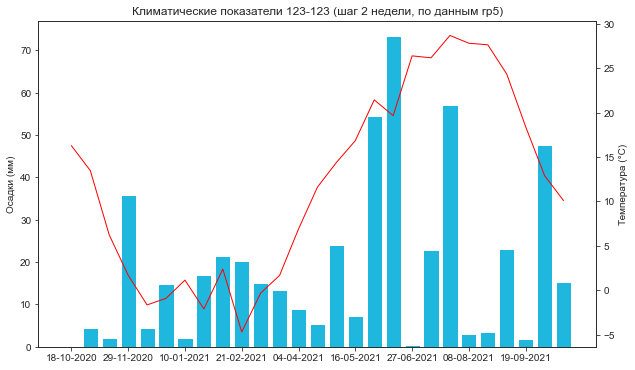

In [155]:
sns.set_style("ticks")

fig, ax1 = plt.subplots(figsize=(10,6))


ax1 = sns.barplot(data = two_week_resample , x = 'str_date', y  = 'sum_percepetation',color = "#00C9FF" )
ax1.set( ylabel='Осадки (мм)',xlabel = "", title=f'Климатические показатели 123-123 (шаг 2 недели, по данным rp5)' )


ax2 = ax1.twinx()

ax2 = sns.lineplot(data = two_week_resample["mean_temperature"], color = 'r',linewidth = 1  )
ax2.set( ylabel=f'Температура (\xb0C)') 



plt.locator_params(axis='x', nbins=10)
plt.savefig('output/weather/books_read.jpg')
ready_plot = fig


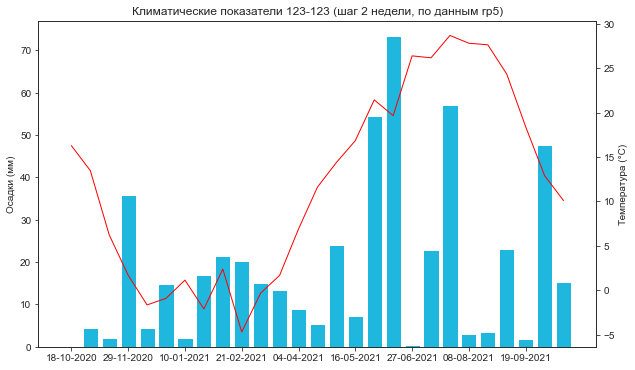

In [156]:
ready_plot

In [111]:
u"\N{DEGREE SIGN}"


'°'

<AxesSubplot:xlabel='new_date', ylabel='NDVI'>

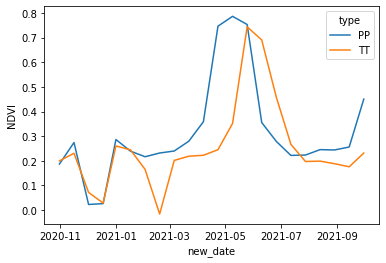

In [11]:
sns.lineplot(data = year_annual_NDVI_sample, x = 'new_date',y = 'NDVI', hue = 'type')

In [7]:
import rasterio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [11]:
two_fields = gpd.read_file(two_fields)


In [13]:
import rasterio

In [14]:
sen2 = rasterio.open("raster_data\Field_scale_sentinel2_2021-08-27_scene.tif").read()

In [20]:
from rasterio import mask

In [21]:

def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]
PP = getFeatures(two_fields[two_fields['type'] == 'PP'])
array, transform  = mask(dataset=sen2, shapes=PP, crop=True)
array[array == 0] = np.nan
NDTI_array = array[7]
NDTI_array = NDTI_array[~np.isnan(NDTI_array)]

TypeError: 'module' object is not callable

In [22]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]
PP = getFeatures(two_fields[two_fields['type'] == 'PP'])

In [3]:
'YeS'.lower()

'yes'